The idea behind K-means is to find clusters. In other words, to classify unlabeled data. 

How to implement this algorithm?

    1. We select k random points making these the center of each cluster (centroids). 
    2. We label the data based on which center is closer to the data. 
    3. We go to the center point of the new cluster (the closest to the new centroid) and select that new point as the new center of the cluster. 
    4. We repeat this process until the old center are the new centers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
class KMeans:
    
    """
    Parameters
    -----------
    n_clusters: int
        Number of centroids the data set will have and therefore, the number of classes
    random_state: int
        To initialize the centroids 
    max_iter: int
        Stop the iterations
    """
    def __init__(self, n_clusters, random_state, max_iter=10):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.max_iterations = max_iter
        
    def fit(self, X):
        """
        Parameters
        -----------
        X: nd-array. shape = [n_samples, n_features]
        
        Fit the X and initialize the clusters as well as the labels
        
        """
        self.X = X
        self.labels = np.arange(0, self.n_clusters)
        self.__initialization()
        
    def predict(self):
        self.targets_dict = {}
        self.targets_dict[0] = self.y
        n = 1
        
        for _ in self._update_clusters():
            self.__label_data()
            self.targets_dict[n] = self.y
            n += 1
            
    def __initialization(self):
        self.__random_clusters()
        self.__label_data()
        
    def __random_clusters(self):
        self.clusters_ = self.X[np.random.choice(len(self.X), size=self.n_clusters, replace=False)]
        
    def __label_data(self):
        self.y = self.labels[self.__distance()]
        
    def __distance(self):
        """Compute the euclidian distances between each sample respect each centroid"""
        
        distances = np.array([np.sqrt(np.sum((self.X - cluster) ** 2, axis=1)) 
                              for cluster in self.clusters_]).T
        
        # each row is the distance of one sample respect a single cluster
        return np.argmin(distances, axis=1)
    
    def __mean_point(self, cluster, X_i):
        """Get the point closest to the centroid"""
        m = np.mean(X_i, axis=0)
        d_m = np.array(np.sqrt(np.sum((X_i - m) ** 2, axis=1)))
        return X_i[np.argsort(d_m)[0]]
        
        
    def _update_clusters(self):
        """Generator to update the clusters"""
        self.clusters_dict = {}
        self.clusters_dict[0] = self.clusters_
        
        diff_clusters = True
        n = 0
        new_clusters = []
        first_time = False
        
        
        while diff_clusters:
            
            # label points by label points to get the new centroid
            for i, cluster in enumerate(self.clusters_):
                X_i = self.X[self.y == i]
                if len(X_i) > 0:
                    new_cluster = self.__mean_point(cluster, X_i)
                    new_clusters.append(new_cluster)
                else:
                    new_clusters.append(cluster)
            
            self.clusters_ = np.array(new_clusters).reshape(self.clusters_.shape)
            yield 
            
            
            # stop iterating if we get the same clusters 
            if (self.clusters_dict[n] == self.clusters_).all(): 
                diff_clusters = False
                break
                
            self.clusters_dict[n+1] = self.clusters_
            new_clusters = []
            n += 1
            
            # stop iterating if we have iterated more than self.max_iterations
            if n > self.max_iterations:
                diff_clusters = False
                break

In [3]:
def plot_clusters_process(X, y, km):
    
    for key in kmeans.clusters_dict.keys():
    
        colors = ('red', 'blue', 'lightgreen', 'black', 'yellow')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        cluster = kmeans.clusters_dict[key]
        fig = plt.figure(figsize=(10, 7))

        plt.scatter(X[:, 0], X[:, 1], 
                    c=np.array(colors)[kmeans.targets_dict[key]], 
                    alpha=0.7, edgecolor='black', label='Data')

        plt.scatter(cluster[:, 0], cluster[:, 1], 
                    c=[], s=200, lw=2, edgecolor='black', 
                    ls='--', label='Centroids')

        plt.title(f'Clusters at iteration number: {key + 1}', fontsize=35)
        plt.xticks([])
        plt.yticks([])

        plt.legend()
        plt.axis('equal')
    
    plt.show()

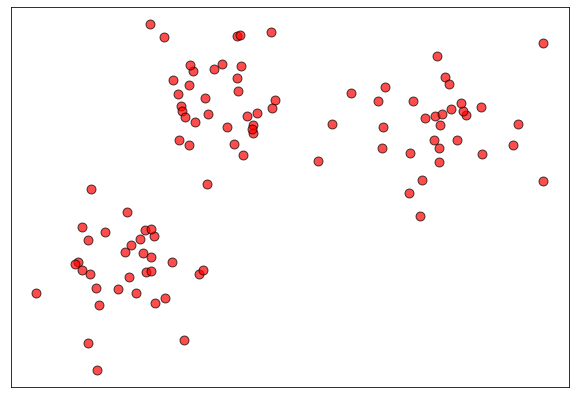

In [19]:
X, y = make_blobs(n_samples=100, centers=3, random_state=np.random.randint(1000), cluster_std=1.5)
kmeans = KMeans(3, 32, max_iter=20)
kmeans.fit(X)
kmeans.predict()

fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(X[:, 0], X[:, 1], 
           c='red', s=80, edgecolor='black', alpha=0.7)

ax.set_xticks([])
ax.set_yticks([])
ax.axis('equal')

plt.show()

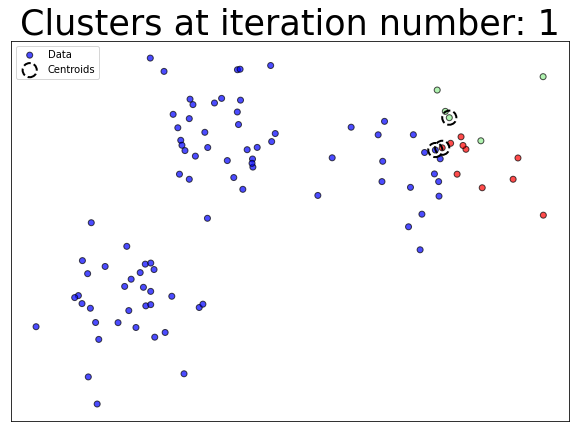

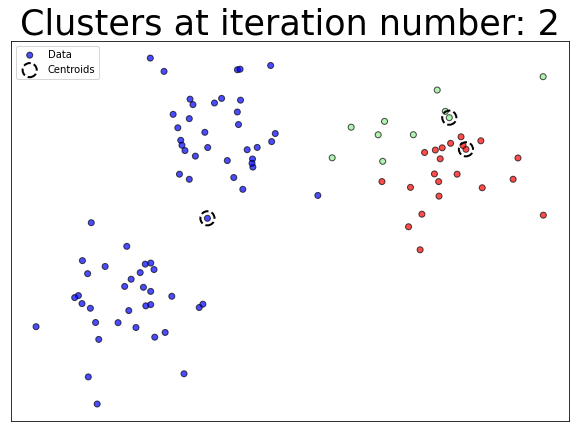

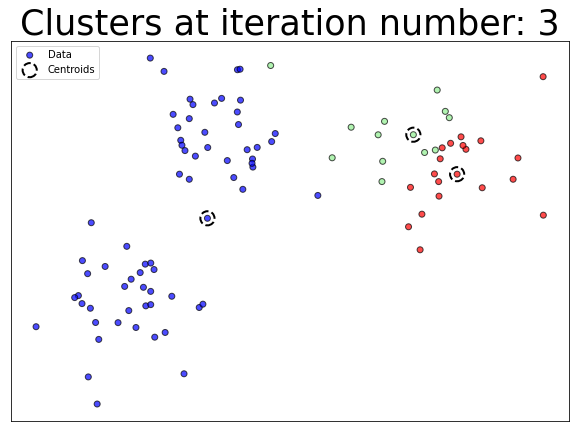

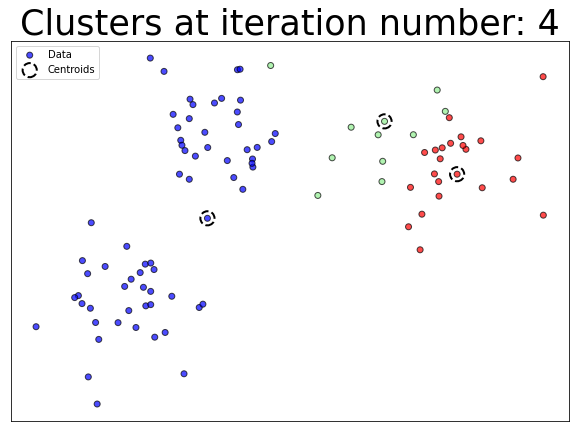

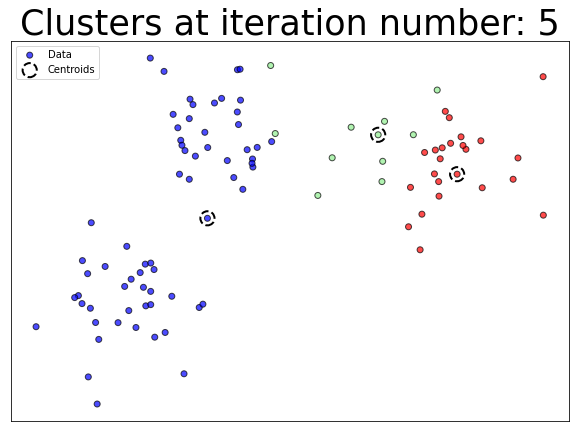

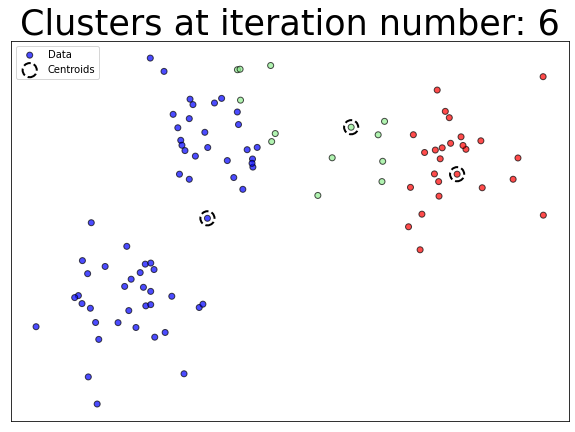

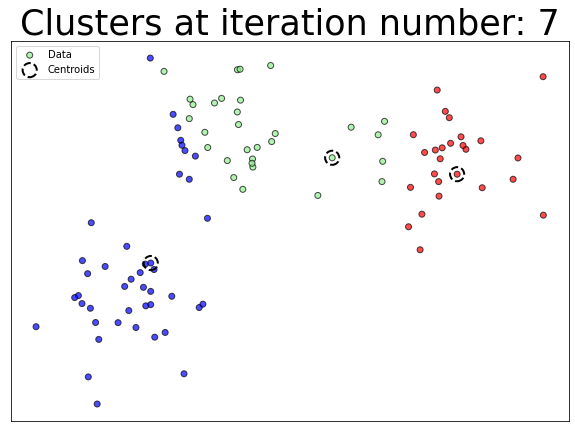

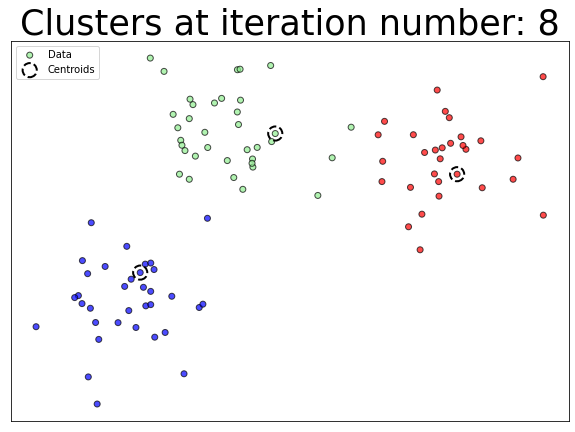

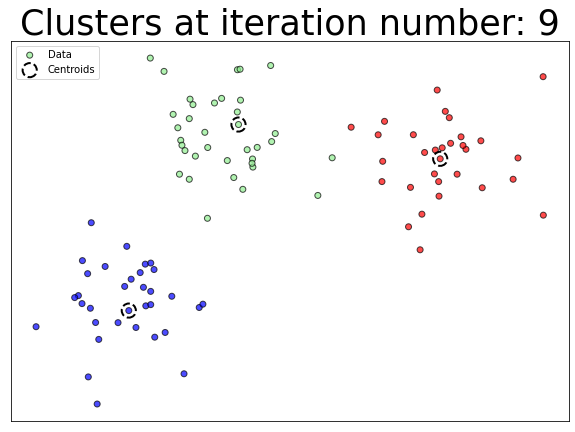

In [20]:
plot_clusters_process(X, y, kmeans)

## Check Likehood

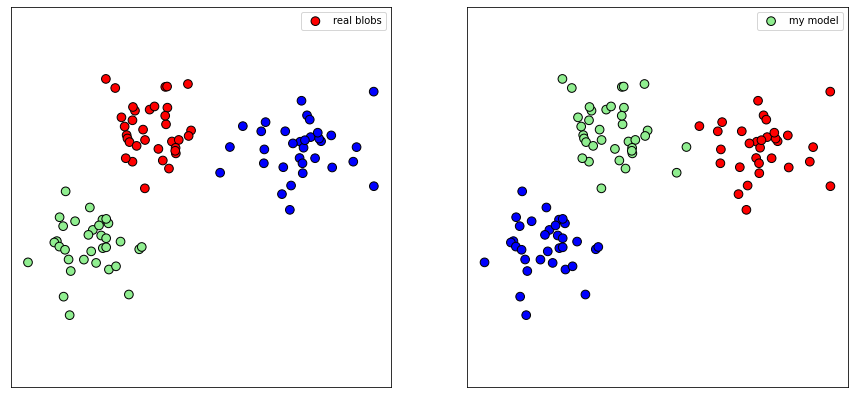

In [21]:
colors = np.array(['red', 'blue', 'lightgreen', 'black', 'yellow'])
cmap = ListedColormap(colors[:len(np.unique(y))])

fig, ax = plt.subplots(ncols=2, figsize=(15, 7))

ax[0].scatter(X[:, 0], X[:, 1], 
              c=colors[y], label='real blobs', 
              edgecolor='black', s=75)
ax[1].scatter(X[:, 0], X[:, 1], 
              c=colors[kmeans.y], label='my model', 
              edgecolor='black', s=75) 

[ax[i].set_xticks([]) for i in range(len(ax))]
[ax[i].set_yticks([]) for i in range(len(ax))]

[ax[i].axis('equal') for i in range(len(ax))]
[ax[i].legend() for i in range(len(ax))]

plt.show()